### Midterm Exam

Start Time: 3/12/2024 10:00am, Due Time: 3/12/2024 11:30am EST.

**NOTE: This exam is open book/notes and you have 90 minutes for the exam. (100 points.)**

**Late submission will not be accepted. Please submit this notebook in BrightSpace before the exam expires!**

**ChatGPT is not allowed!**



### Problem 1 (60 points): 
Please write down your answers to the following questions (no code needed, please answer with your explanations or understandings for each question):

(1) Please describe how we do sampling with replacement, sampling without replacement and stratified sampling. (15 points)

Sampling is where you take a portion of a population to use for some specific purpose. Sampling with replacement is where we randomly select a value from the population and then leave it in there for the next time when we randomly select the next point. This means that the already selected value can be selected again or even several times. In sampling without replacement, the randomly selected value is removed from the population so it can no longer be selected again. This decreases the size of the population for the next pick since there is one less value that can be chosen. Stratified sampling is where we create several subpopulations based on the original population. Each new subpopulation has a unique trait that seperates them from the the other subpopulations (example: MLB baseball is the whole population and each division is a subpopulation). Sampling is then performed on each of these subpopulations which means that each group is getting representation. If this was not done and we did normal sampling instead, then there is a chance that there would be no values chosen from one of the groups.

(2) Please explain **underfitting** and **overfitting** in terms of bias, variance and model complexity. (15 points)

(For example, please explain in underfitting cases, whether or not the model has high bias and variance, and whether the model should be a complex model or simple model, and explain why. Please also explain the overfitting case.)

Underfitting has high bias, low variance, and is simple. The bias is high because the model does not understand the complex relationships and patterns in the data so it is a very simple model. The model has low variance because the flexibility is low and the patterns is the data are not fully captured. Underfitting is where the model that is created is too simple for the dataset so it fails to capture all the complex relationships and patterns. Overfitting has low bias, high variance, and is too complex. The bias is low because all of the patterns and minute details of the data are captured, meaning that it is not too simple. The variance is high because the model is overly flexible and captures too much that is going on in the data such as the random noise. The model has too much complexity because it is trying to capture too much of the patterns and relationships which causes it to perform well on the training set but poorly on the testing set. 

(3) Please write the pros and cons of Hold-out cross validation. (15 points)

Hold-out cross validation is a useful technique that allows us to see how the model will perform on data that it has not seen yet. This version of validation is easy to implement and understand because we are just taking a portion of the data and leaving it out to validate the model later. This is more simple than other methods such as k-fold cross validation or leave on out cross validation. It is also much more computationally efficient that these other methods which can save a lot of time and memory when working on larger datasets. A con to this method is that a significant portion of the data is not being used during model training so we are losing information. The other methods use all the data in seperate validations. This is especially prevelent in smaller datasets where we there would be substantial information lost. Another potential issue is that the data that is taken out for validation might have not been the best data to randomly take out. The data might indicate that the model is too good or too bad based on what data is in the validation set. There is no chance to double check the validation performance with different data in the dataset. What is meant by this is that a single split oftentimes does not represent the data well as a whole.

(4) Please iillustrate in what circumstances where $R^2$ cannot successfully measure the model performance, and why. (15 points)

R^2 is a good indicator to evaluate a model because it tells us how much of the variance is predictable by the features in the model. However, there are some circumstances where it is not a good way to measure a models performance. One situation is when a model is not linear because R^2 assumes a linear relationship in the model. The reason that R^2 works for a linear relationship is because its formula takes into account the difference between the actual data points and the predicted values while also taking into account the actual data points and a model if it was just the mean. R^2 has the first part of that in its numerator and the second part in the denominator and this formula assumes a linear relationship. Because of this, when the relationship is not linear it will say that the model performed badly even if it did not. Another situation where R^2 is not the best is when there is the presence of large outliers. These outliers signifcantly impact the equation so there is a disproportionate weight that is being given to these single data points which can alter the overall measure of performance. If there is one data point that is so extreme, then the R^2 might say that the model is not performing well but in reality it is performing reasonably well. Heteroskedacity also is a circumstance where R^2 might not be the best indicator of model performance because R^2 assumes constant variance. When the variance is not constant, the model might give too good or too bad of a performance evaluation

### Problem 2 (40 points):
Please use the `Social_Network_Ads.csv` dataset to answer the following questions. You can use any libraries you like:

(1) Split the dataset into the Training set (75%) and Test set (25%). (10 points)

In [2]:
import pandas as pd
datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
#uses the age and estimated salary columns to predict the purchased column

In [31]:
from sklearn.model_selection import train_test_split

#split the dataset into training set (75%) and test set (25%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)



(2) Please do feature scailing using StandardScaler from sklean. (10 points)

In [32]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

# fit the scaler on the training set for the x values
x_train_scale = scale.fit_transform(x_train)

# now on the testing set for the x values
x_test_scale = scale.transform(x_test)

(3) Please train a random forest using trainning set (number of trees = 200). (10 points)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# beginning the creation the random forest 200 trees and a random state of 10
random_forest = RandomForestClassifier(n_estimators=200, random_state=10)

# train the model
random_forest.fit(x_train_scale, y_train)




RandomForestClassifier(n_estimators=200, random_state=10)

(4) Predict the test results and create a confusion matrix. (10 points)

In [34]:
from sklearn.metrics import confusion_matrix

# make the predictions
prediction = random_forest.predict(x_test_scale)

# make a confusion matrix based on the results
confusion_matrix = confusion_matrix(y_test, prediction)

confusion_matrix

array([[62,  7],
       [ 2, 29]], dtype=int64)

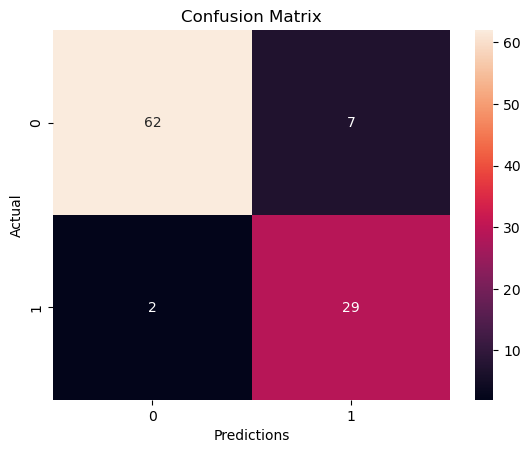

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#make a confustion matrix heatmap using seaborn
sns.heatmap(confusion_matrix, annot=True)

# add labels using matplotlib
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and rename it with your name (for example, "yourname.ipynb"). This is the file you need to submit. Please make sure all the testing results are in the notebook. 